In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.metrics import mean_squared_log_error
import pickle
from sklearn.utils import resample

In [2]:
data_dir = '/home/jupyter/Machine/data'
os.listdir(data_dir)

['test_processed.csv',
 'train_processed.csv',
 'sample_submission.csv',
 'train.csv',
 'test.csv']

In [3]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
57089,id2883731,2,2016-05-23 20:25:09,2016-05-23 20:31:45,1,-73.982063,40.757435,-73.967636,40.751808,N,396
1257456,id0885384,2,2016-01-14 07:29:18,2016-01-14 07:36:28,1,-73.979919,40.737446,-73.992294,40.738037,N,430
706090,id1800119,1,2016-06-28 15:48:30,2016-06-28 16:21:14,1,-73.984901,40.774414,-73.959045,40.743591,N,1964
765093,id2327432,2,2016-06-24 20:42:36,2016-06-24 21:31:21,1,-73.782288,40.644569,-73.972610,40.757092,N,2925
857768,id2381994,2,2016-03-14 09:03:59,2016-03-14 09:23:35,5,-73.991562,40.754761,-73.952911,40.784901,N,1176
1326495,id1756213,1,2016-01-14 07:36:19,2016-01-14 07:44:09,1,-73.990974,40.755608,-73.974182,40.759186,N,470
994604,id3074462,1,2016-02-03 21:53:17,2016-02-03 22:06:15,2,-73.976936,40.787659,-73.975037,40.761421,N,778
1169965,id2141402,2,2016-02-12 04:40:39,2016-02-12 05:01:27,6,-73.982643,40.742638,-73.794159,40.644615,N,1248
602239,id1152305,1,2016-03-21 14:35:22,2016-03-21 14:38:11,1,-74.002678,40.739388,-73.994354,40.740894,N,169
159535,id1312789,2,2016-06-03 08:15:17,2016-06-03 08:17:32,3,-73.956596,40.778061,-73.953918,40.775360,N,135


In [4]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
221113,id0707031,1,2016-04-27 13:35:14,1,-73.953064,40.786163,-73.968285,40.764954,Y
501257,id1572965,1,2016-02-08 17:03:17,1,-73.973778,40.792313,-73.977264,40.787281,N
27743,id0842430,2,2016-06-22 16:07:06,1,-73.963226,40.755699,-73.962433,40.755409,N
623251,id2880770,1,2016-01-01 14:24:14,2,-73.989914,40.729370,-73.971413,40.748474,N
306602,id0061767,1,2016-04-03 10:11:37,1,-73.983086,40.770058,-74.008224,40.737480,N
220551,id3350339,2,2016-04-27 17:24:44,1,-73.991936,40.756157,-73.987625,40.762161,N
224652,id1269655,1,2016-04-26 12:29:08,1,-73.970116,40.765846,-73.963943,40.773827,N
377355,id2085214,1,2016-03-14 09:02:45,1,-73.971283,40.756210,-73.968315,40.751095,N
540262,id3227728,2,2016-01-28 13:07:57,1,-73.981567,40.759720,-73.961647,40.768639,N
212768,id1492892,1,2016-04-29 20:03:55,1,-73.953285,40.779343,-73.979614,40.746433,N


In [5]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06
mean,1.534303e+00,1.663950e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.376007e+02
std,4.988221e-01,1.313619e+00,7.093200e-02,3.288342e-02,7.067477e-02,3.588855e-02,6.694573e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,2.706400e+04


In [7]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [8]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
1211667,id1523431,2,2016-06-19 08:42:39,2016-06-19 08:49:39,2,-73.871048,40.773861,-73.926239,40.774940,N,420,2016-06-19,19,8,6,6
774830,id2187556,2,2016-02-15 14:37:15,2016-02-15 14:46:17,1,-73.959534,40.762821,-73.961098,40.777710,N,542,2016-02-15,15,14,2,0
103113,id2022566,2,2016-02-04 19:50:19,2016-02-04 19:56:00,1,-73.991508,40.729820,-73.996101,40.737160,N,341,2016-02-04,4,19,2,3
253014,id3948236,1,2016-05-01 08:07:37,2016-05-01 08:11:19,1,-73.959084,40.712093,-73.949440,40.714073,N,222,2016-05-01,1,8,5,6
1237414,id3122513,2,2016-02-26 15:13:44,2016-02-26 15:26:44,1,-73.966347,40.800671,-73.952240,40.789639,N,780,2016-02-26,26,15,2,4
564941,id0161243,2,2016-05-13 23:20:40,2016-05-13 23:29:11,1,-73.907570,40.773975,-73.931877,40.765141,N,511,2016-05-13,13,23,5,4
434017,id1379949,2,2016-04-19 12:18:45,2016-04-19 12:41:40,1,-73.982933,40.781967,-73.964249,40.763939,N,1375,2016-04-19,19,12,4,1
329182,id1978998,1,2016-05-14 19:34:35,2016-05-14 19:39:56,1,-73.990051,40.766460,-73.991661,40.766373,N,321,2016-05-14,14,19,5,5
73232,id2748710,1,2016-05-05 20:25:52,2016-05-05 20:49:16,1,-73.969070,40.764305,-73.911507,40.776672,N,1404,2016-05-05,5,20,5,3
761418,id3315527,1,2016-01-28 22:05:51,2016-01-28 22:37:28,1,-73.990578,40.728474,-73.916924,40.879517,N,1897,2016-01-28,28,22,1,3


In [9]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

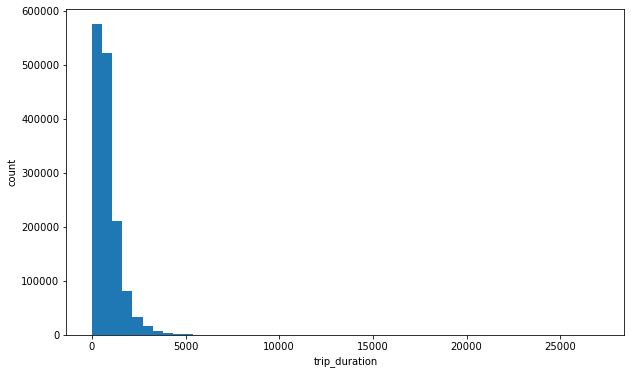

In [10]:
show_hist('trip_duration')

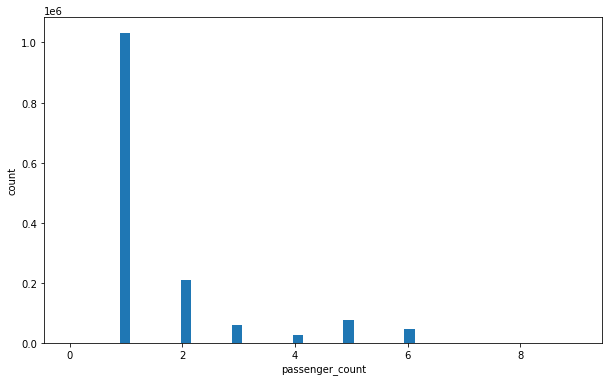

In [11]:
show_hist('passenger_count')

In [12]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [13]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [14]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
867949,id3189951,1,2016-02-15 00:01:57,2016-02-15 00:05:14,1,-73.996559,40.737907,-74.004082,40.744385,N,197,2016-02-15,15,0,2,0,0.959385,1.354047,-41.342984
1018836,id1117246,2,2016-02-15 18:23:14,2016-02-15 18:43:17,6,-73.999954,40.738194,-73.977859,40.715752,N,1203,2016-02-15,15,18,2,0,3.113455,4.356954,143.265989
1368623,id2162493,2,2016-06-02 14:41:54,2016-06-02 15:18:11,1,-73.977821,40.761494,-73.870972,40.774014,N,2177,2016-06-02,2,14,6,3,9.105386,10.391322,81.170547
1355404,id3078805,1,2016-02-01 08:41:47,2016-02-01 09:20:12,1,-73.776718,40.645329,-73.875946,40.738071,N,2305,2016-02-01,1,8,2,0,13.279263,18.684384,-39.018265
1263401,id1155840,1,2016-05-22 16:33:33,2016-05-22 16:36:34,1,-73.965935,40.762379,-73.961945,40.764725,N,181,2016-05-22,22,16,5,6,0.425422,0.596927,52.177627
1389539,id3642625,2,2016-03-30 11:01:58,2016-03-30 11:14:46,1,-73.978302,40.752773,-73.996918,40.760311,N,768,2016-03-30,30,11,3,2,1.777950,2.406244,-61.867103
1212977,id3855407,1,2016-02-25 10:06:08,2016-02-25 10:15:34,1,-73.973251,40.743732,-73.976685,40.739239,N,566,2016-02-25,25,10,2,3,0.577356,0.788911,-149.934093
682077,id1434426,1,2016-01-19 12:01:35,2016-01-19 12:33:42,1,-74.006866,40.729404,-73.989822,40.756851,N,1927,2016-01-19,19,12,1,1,3.372852,4.488131,25.190788
839227,id0992010,2,2016-02-27 21:12:59,2016-02-27 21:27:28,1,-73.979431,40.748734,-74.005005,40.741840,N,869,2016-02-27,27,21,2,5,2.286703,2.920789,-109.575860
638887,id0948557,2,2016-03-19 15:15:39,2016-03-19 15:25:05,1,-73.954399,40.764332,-73.970650,40.750591,N,566,2016-03-19,19,15,3,5,2.051317,2.896492,-138.139008


In [15]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [16]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,haversine_distance,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
676853,id1458573,2016-05-26 08:23:02,2016-05-26 08:33:54,-73.962288,40.769691,-73.970192,40.760075,652,2016-05-26,0.001015,...,0,1,0,0,0,0,1,0,0,0
19593,id0678019,2016-03-03 11:03:25,2016-03-03 11:35:06,-73.863274,40.769810,-73.989624,40.744926,1901,2016-03-03,0.008861,...,0,0,0,0,0,0,1,0,0,0
901755,id0985635,2016-04-13 18:58:20,2016-04-13 19:16:53,-73.958527,40.772900,-73.976036,40.751083,1113,2016-04-13,0.002288,...,1,0,0,0,0,1,0,0,0,0
1352234,id0872734,2016-01-07 19:58:33,2016-01-07 20:11:28,-74.006752,40.735828,-73.986214,40.772362,775,2016-01-07,0.003558,...,0,0,0,0,0,0,1,0,0,0
515475,id2312908,2016-06-26 22:59:30,2016-06-26 23:14:41,-73.991577,40.749920,-73.956268,40.726341,911,2016-06-26,0.003195,...,0,0,1,0,0,0,0,0,0,1
1226908,id1663995,2016-05-28 14:21:03,2016-05-28 14:23:13,-73.956581,40.762939,-73.958160,40.760471,130,2016-05-28,0.000246,...,0,1,0,0,0,0,0,0,1,0
242113,id3300732,2016-06-17 22:29:42,2016-06-17 23:03:36,-73.977432,40.749409,-73.993454,40.637249,2034,2016-06-17,0.010109,...,0,0,1,0,0,0,0,1,0,0
1136192,id2015870,2016-03-31 04:23:47,2016-03-31 04:26:44,-73.991943,40.721893,-73.991592,40.722466,177,2016-03-31,0.000057,...,0,0,0,0,0,0,1,0,0,0
322897,id0392421,2016-01-29 11:41:56,2016-01-29 11:51:07,-73.986214,40.734459,-73.994789,40.736679,551,2016-01-29,0.000615,...,0,0,0,0,0,0,0,1,0,0
799043,id2425131,2016-04-01 08:16:34,2016-04-01 08:23:01,-73.982819,40.742153,-73.990120,40.750954,387,2016-04-01,0.000931,...,1,0,0,0,0,0,0,1,0,0


In [17]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
654698,1229,0.002378,0.002772,0.044814,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1446013,2878,0.009761,0.009667,0.758430,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1180992,477,0.001009,0.001319,0.094853,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1111669,689,0.001413,0.001663,0.202369,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
331823,1023,0.001044,0.001381,0.856683,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1398894,1300,0.005929,0.007229,0.559270,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1373681,936,0.001442,0.001357,0.499933,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
500587,303,0.000896,0.001192,0.619735,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
259428,469,0.001580,0.002096,0.862780,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1142039,1640,0.007681,0.009629,0.070616,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [19]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
37952,0.001880,0.002291,0.559084,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
111628,0.000927,0.001228,0.890614,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
418183,0.000337,0.000439,0.156502,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
429369,0.001852,0.002329,0.571933,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
614561,0.003556,0.004430,0.067725,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8147,0.001011,0.001007,0.009527,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
364051,0.001266,0.001642,0.410801,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
200032,0.003244,0.003741,0.541747,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
361261,0.000807,0.001073,0.124833,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
165840,0.000624,0.000760,0.558873,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['passenger_count_7', 'trip_duration', 'passenger_count_8']

In [21]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
241372,0.001390,0.001422,0.514480,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
93469,0.000892,0.001186,0.882331,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
28506,0.000643,0.000733,0.961433,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
102468,0.005286,0.006900,0.593569,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
126864,0.000634,0.000838,0.394369,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
193776,0.004443,0.005538,0.068008,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
499341,0.000458,0.000554,0.943374,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
148720,0.003064,0.003458,0.786065,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
317635,0.000435,0.000412,0.749240,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
261734,0.001794,0.002295,0.080422,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

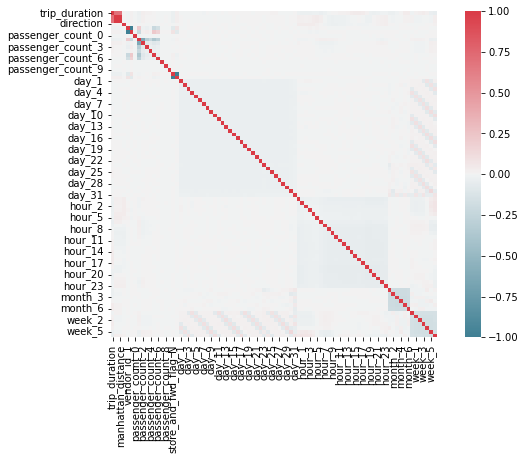

In [22]:
corr = train_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [23]:
train_df.to_csv('/home/jupyter/Machine/data/train_processed.csv', index=False)
test_df.to_csv('/home/jupyter/Machine/data/test_processed.csv', index=False)

In [49]:
models = {
    "random_forest": RandomForestRegressor(n_jobs = -1, random_state = 42),
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha = 0.01),
    "svm": svm.LinearSVC(random_state=42),
    "rbf_svm": svm.SVC(kernel='rbf'),
    # "poly_svm": svm.SVC(kernel='poly')
}

In [38]:
def run_expirement(size, model_name, do_resample = False):
  data = train_df[0:size]
  if do_resample:
    data = resample(train_df, n_samples=size)

  train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
  
  train_X = train_data.drop(['trip_duration'], axis=1)
  train_y = train_data["trip_duration"]
  val_X = val_data.drop(['trip_duration'], axis=1)
  val_y = val_data["trip_duration"]

  print(train_X.shape, train_y.shape)

  print("Training...")
  model = models[model_name]
  model.fit(train_X, train_y)
  print("Training Done...")

  pickle.dump(model, open('/home/jupyter/Machine/models/'+str(model_name)+'_'+str(size)+'.sav', 'wb'))
  print("Models Saved...")

  print("Evaluating...")
  score = model.score(val_X, val_y), model.score(train_X, train_y)
  print("Score: ", score)

  print("Prediction...")
  train_preds = model.predict(train_X)
  train_preds = np.where(train_preds < 0, 0, train_preds)
  train_rmsle = mean_squared_log_error(train_y, train_preds, squared=False)
  print(str(size) + " Training RMSLE: ", train_rmsle)

  val_preds = model.predict(val_X)
  val_preds = np.where(val_preds < 0, 0, val_preds)
  val_rmsle = mean_squared_log_error(val_y, val_preds, squared=False)
  print(str(size) + " Validation RMSLE: ", val_rmsle)

In [39]:
def save_submission(size, model_name):
  submission_df = pd.read_csv(data_dir + '/sample_submission.csv')
  model = pickle.load(open('/home/jupyter/Machine/models/'+str(model_name)+'_'+str(size)+'.sav', 'rb'))
  test_preds = model.predict(test_df)
  submission_df['trip_duration'] = test_preds
  submission_df.to_csv('/home/jupyter/Machine/data/submission_'+str(model_name)+'_'+str(size)+'.csv', index=None)
  submission_df.sample(10)

In [27]:
# run_expirement(10000, "linear_regression", True)
# save_submission(10000, "linear_regression")

In [28]:
# run_expirement(500000, "linear_regression")
# save_submission(500000, "linear_regression")

In [29]:
# run_expirement(train_df.shape[0], "linear_regression")
# save_submission(train_df.shape[0], "linear_regression")

In [30]:
# run_expirement(100000, "svm")

In [31]:
# save_submission(100000, "svm")

In [32]:
# run_expirement(500000, "rbf_svm")

In [33]:
# run_expirement(100000)
# save_submission(100000)

In [34]:
# run_expirement(500000)
# save_submission(500000)

In [35]:
# run_expirement(1000000)
# save_submission(1000000)

In [36]:
# run_expirement(train_df.shape[0])
# save_submission(train_df.shape[0])

In [57]:
run_expirement(train_df.shape[0], "ridge")
save_submission(train_df.shape[0], "ridge")

(1165282, 85) (1165282,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (0.5684744309580824, 0.5089319437519404)
Prediction...
1456603 Training RMSLE:  0.5804558744339188
1456603 Validation RMSLE:  0.5804851880693559


In [58]:
run_expirement(100000, "ridge")
save_submission(100000, "ridge")

(80000, 85) (80000,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (0.605975480436623, 0.623786112488897)
Prediction...
100000 Training RMSLE:  0.5550430909521775
100000 Validation RMSLE:  0.5543625620059016


In [59]:
run_expirement(500000, "ridge")
save_submission(500000, "ridge")

(400000, 85) (400000,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (-0.13903227230489956, 0.6025392421923496)
Prediction...
500000 Training RMSLE:  0.5536108731849032
500000 Validation RMSLE:  0.5530258852768958
